In [1]:
import fastbook
fastbook.setup_book()

/Users/b/opt/miniconda3/envs/fastai/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/b/opt/miniconda3/envs/fastai/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: /Users/b/opt/miniconda3/envs/fastai/lib/python3.9/site-packages/torchvision/image.so
  Expected in: /Users/b/opt/miniconda3/envs/fastai/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [5]:
from duckduckgo_search import ddg_images
from fastcore.all import *
def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')
print('done')

done


In [7]:
urls = search_images('bird photos', max_images=1)
urls[0]

'http://hdqwalls.com/wallpapers/colorful-parrot-bird.jpg'

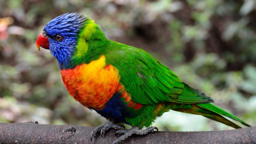

In [8]:

from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

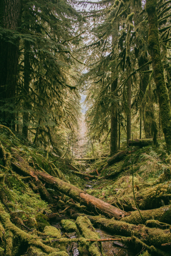

In [12]:
download_url(search_images('forest photos', max_images=2)[1], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)
     

In [13]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)
     

25

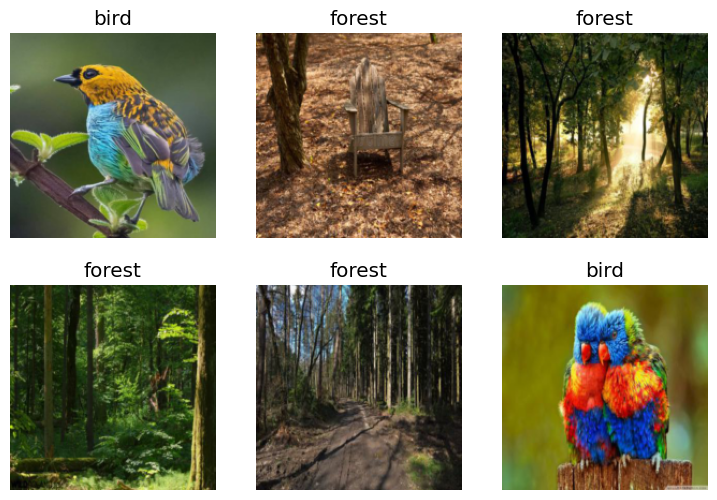

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)